# References

Scikit-learn documentation: https://scikit-learn.org/stable/supervised_learning.html A powerful ML library, used to generate data, pre-process it, and train a variety of linear models.

# Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split


# Linear Regression Example

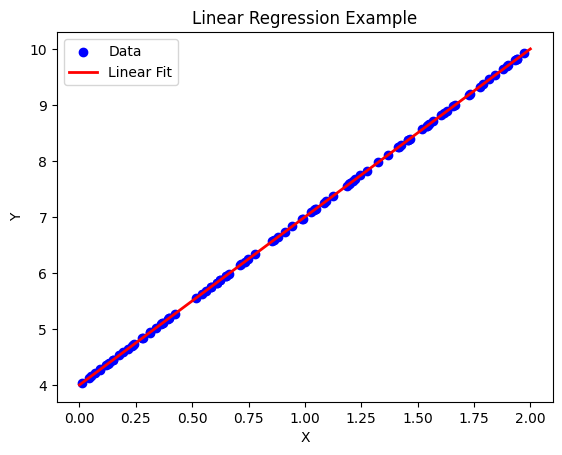

array([[2.99999989]])

In [2]:
# Generate synthetic linear data
np.random.seed(42)
X_linear = 2 * np.random.rand(100, 1)
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1)/2000000  # y = 4 + 3x + noise

# Fit Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_linear, y_linear)

# Predictions
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = linear_regressor.predict(X_new)

# Plot
plt.scatter(X_linear, y_linear, color="blue", label="Data")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Linear Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()
linear_regressor.coef_

# Logistic Regression Example

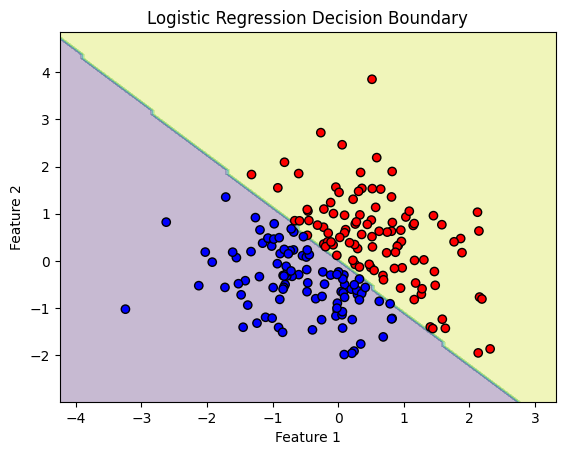

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1])

In [3]:
# Generate synthetic classification data
np.random.seed(42)
X_logistic = np.random.randn(200, 2)
y_logistic = (X_logistic[:, 0] + X_logistic[:, 1] > 0).astype(int)  # Decision boundary: x + y > 0

# Fit Logistic Regression Model
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_logistic, y_logistic)

# Create a mesh grid for visualization
x_min, x_max = X_logistic[:, 0].min() -1, X_logistic[:, 0].max() + 1
y_min, y_max = X_logistic[:, 1].min() - 1, X_logistic[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = logistic_regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_logistic[:, 0], X_logistic[:, 1], c=y_logistic, edgecolors="k", cmap="bwr")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()
(X_logistic[:, 0] + X_logistic[:, 1] > 0).astype(int)

# Non-Linear Data Handling

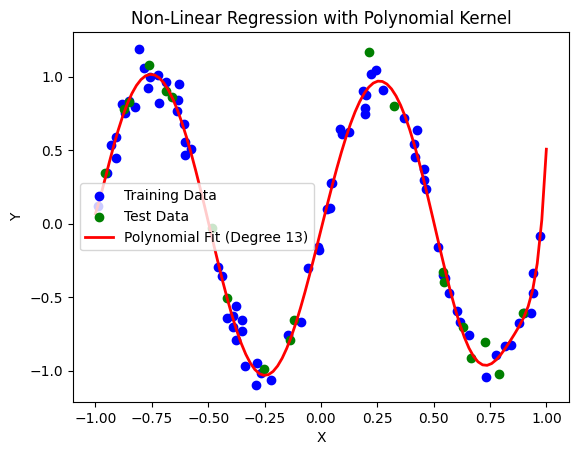

Mean Squared Error: 0.0073


In [4]:
# Generate non-linear data
np.random.seed(42)
X_nl = 2 * np.random.rand(100, 1) - 1  # X in range [-1, 1]
y_nl = np.sin(2 * np.pi * X_nl).ravel() + 0.1 * np.random.randn(100)  # y = sin(2πx) + noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

# Fit a polynomial regression model
degree =13   # Kernel transform (polynomial of degree 5)
poly_regressor = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_regressor.fit(X_train, y_train)

# Predictions
X_plot = np.linspace(-1, 1, 100).reshape(100, 1)
y_poly_pred = poly_regressor.predict(X_plot)

# Plot
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_plot, y_poly_pred, color="red", linewidth=2, label=f"Polynomial Fit (Degree {degree})")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Regression with Polynomial Kernel")
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, poly_regressor.predict(X_test))
print(f"Mean Squared Error: {mse:.4f}")


In [5]:
ssddd

NameError: name 'ssddd' is not defined

# Bonus: Support Vector Regression

In [ ]:
# Support Vector Regression with RBF kernel
svr_regressor = SVR(kernel="rbf", C=100, gamma=10)  # RBF kernel transformation
svr_regressor.fit(X_train, y_train)

# Predictions
y_svr_pred = svr_regressor.predict(X_plot)

# Plot
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_plot, y_svr_pred, color="purple", linewidth=2, label="SVR with RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Regression with SVR Kernel")
plt.legend()
plt.show()

# Evaluate model performance
mse_svr = mean_squared_error(y_test, svr_regressor.predict(X_test))
print(f"SVR Mean Squared Error: {mse_svr:.4f}")
# X_plot

# Una Pregunta Dificil...

In [ ]:
# Generate non-linear data
np.random.seed(42)
X_nl = 2 * np.random.rand(100, 1) - 1  # X in range [-1, 1]
y_nl = np.cos(2 * np.pi * X_nl).ravel() + 0.1 * np.random.randn(100)  # y = cos(2πx) + noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

# TODO: Choose and apply an appropriate kernel transformation
# Hint: Consider polynomial features or an alternative kernel-based regression method.

# Define your model here (e.g., Polynomial Regression, SVR with RBF kernel, etc.)
model = SVR(kernel="rbf", gamma= 10, C = 10)

# Fit the model to the training data
model.fit(X_train, y_train)

# Generate predictions
X_plot = np.linspace(-1, 1, 100).reshape(100, 1)
y_pred = model.predict(X_plot)

# Plot the results
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_plot, y_pred, color="red", linewidth=2, label="Your Model Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-Linear Regression - Apply a Kernel Transform")
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, model.predict(X_test))
print(f"Mean Squared Error: {mse:.4f}")


In [ ]:
sdsd

# Decision Trees

## Dataset:
| Cap Color | Stalk Shape | Solitary | Edible |
|-----------|-------------|----------|--------|
| Brown     | Tapering    | Yes      | 1      |
| Brown     | Enlarging   | Yes      | 1      |
| Brown     | Enlarging   | No       | 0      |
| Brown     | Enlarging   | No       | 0      |
| Brown     | Tapering    | Yes      | 1      |
| Red       | Tapering    | Yes      | 0      |
| Red       | Enlarging   | No       | 0      |
| Brown     | Enlarging   | Yes      | 1      |
| Red       | Tapering    | No       | 1      |
| Brown     | Enlarging   | No       | 0      |


## Encoded:

| Cap Color | Stalk Shape | Solitary | Edible |
|-----------|-------------|----------|--------|
| 1     | 1    | 1      | 1      |
| 1     | 0   | 1      | 1      |
| 1     | 0   | 0       | 0      |
| 1     | 0   | 0       | 0      |
| 1     | 1    | 1      | 1      |
| 0       | 1    | 1      | 0      |
| 0       | 0   | 0       | 0      |
| 1     | 0   | 1      | 1      |
| 0       | 1    | 0       | 1      |
| 1     | 0   | 0       | 0      |

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Training data
X_train = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [1, 1, 1],
    [1, 0, 0]
])
y_train = np.array([1, 1, 0, 0, 1, 0])

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['Feature1', 'Feature2', 'Feature3'],
          class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

In [ ]:
# Testing data
X_test = np.array([[0, 0, 0]])
prediction = clf.predict(X_test)

print(f"Prediction for {X_test}:", prediction[0])

# Task for Decision trees

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the dataset
wine = load_wine()

# Convert to DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [ ]:
# y = df.pop("target")

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size = 0.2, random_state=42)

In [ ]:
decision_maker = DecisionTreeClassifier()
decision_maker.fit(X_train, y_train)


In [ ]:
plt.figure(figsize=(20, 16))
plot_tree(decision_maker,
          class_names=['Class 0', 'Class 1','class2'], filled=True)
plt.show()

In [ ]:
y_pred = decision_maker.predict(X_test)

output = y_pred == y_test
accuracy = (output == True).sum() / len(output)
print(f"The accuracy of the decision tree is {(accuracy*100) : .2f}%")

## Let's use random forest to increase the accuracy even further

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000000)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

output_new = y_pred == y_test
accuracy_new = (output_new ==True).sum() / len(output)
print(f"The accuracy of the Random Forest Classifier is {(accuracy*100) : .2f}%")